---

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=15>
تحلیل داده‌ی فیلم‌های سینمایی
</font>
</h1>

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=5>
 زهرا ربیعی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این پروژه، با بهره‌گیری از داده‌های گسترده IMDB و به کارگیری تکنیک‌های تحلیل داده، به دنبال پاسخ به سوالاتی مانند عوامل مؤثر بر موفقیت تجاری فیلم‌ها، بررسی میزان فروش، ترجیحات مخاطبان در ژانرهای مختلف، و ارتباط بین ویژگی‌های فیلم و نمرات منتقدان هستیم. هدف نهایی ما، ارائه یک تحلیل جامع و مبتنی بر داده از صنعت سینما است.

</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
لینک مرتبط با دیتاست:
</p>



https://www.kaggle.com/datasets/yaminyasinmech/imdb-5000-movies-dataset

---

<a id="0"></a> <br>
 # فهرست  
1. [مرحله اول: استخراج داده‌ها](#1)     
1. [مرحله دوم: آماده‌سازی داده‌ها](#2) 
1. [مرحله سوم: تحلیل داده‌ها و پاسخ به سوالات](#3) 


---


# <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=6> مرحله‌ی اول: استخراج داده‌ها   </font> </p> <a id="1"></a>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در این مرحه داده‌های موجود در فایل movie_dataset.csv را خوانده و مقادیر آن را در دیتا فریم main_df ذخیره می‌کنیم.
    </font>
</p>

In [1]:
# Libraries that I need during analysis.

#Data manipulation
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import spearmanr

import codecs  # for encoding data


In [2]:
main_df= pd.read_csv('movie_dataset.csv')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 حال نگاهی کلی به اطلاعات main_df می‌اندازیم.
    </font>
</p>

In [3]:
main_df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
# ابعاد دیتافریم
main_df.shape  

(4803, 24)

In [6]:
main_df.dtypes  # تایپ ستون‌های دیتافریم

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object

In [7]:
main_df.dtypes.value_counts()  # تعداد تایپ داده در کل ستون ها

object     16
int64       5
float64     3
Name: count, dtype: int64

In [8]:
main_df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
# ستون‌هایی که داده‌ی مفقود دارند


total_missing=main_df.isnull().sum().sort_values(ascending=False)    
total_missing=total_missing[total_missing>0]
total_missing   

homepage        3091
tagline          844
keywords         412
cast              43
director          30
genres            28
overview           3
runtime            2
release_date       1
dtype: int64

In [10]:
total_missing_ratio=total_missing/len(main_df)*100  # درصد داده های مفقود
total_missing_ratio

homepage        64.355611
tagline         17.572351
keywords         8.577972
cast             0.895274
director         0.624610
genres           0.582969
overview         0.062461
runtime          0.041641
release_date     0.020820
dtype: float64

---

<a id="2"></a>
# <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=6> مرحله‌ی دوم: آماده‌سازی داده‌ها   </font> </p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در این مرحله قصد داریم دیتا فریم را برای تحلیل و پاسخ دادن به سوالات آماده کنیم.
در ابتدای کار از  main_df یک کپی ساخته و در df می‌ریزیم.
    </font>
</p>

In [11]:
df=main_df.copy()

In [12]:
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 ستون هایی که برای تحلیل مورد نیاز نیستند را حذف می‌کنیم.
    </font>
</p>

In [13]:
df=df.drop(columns=['homepage','overview','keywords','original_title','tagline','index','cast','crew'])

In [14]:
#ستون‌هایی که از جنس آبجکت هستند را به حروف کوچک تبدیل می‌کنیم

df['genres']=df['genres'].str.lower()
df['production_companies']=df['production_companies'].str.lower()
df['spoken_languages']=df['spoken_languages'].str.lower()
df['title']=df['title'].str.lower()
df['director']=df['director'].str.lower()
df['original_language']=df['original_language'].str.lower()




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 تعدادی از ستون‌ها کاراکتر ها را به درستی نمایش نمی‌دهند بنابراین برای نمایش صحیح آن از  encoding استفاده می کنیم.
    </font>
</p>

In [15]:
df['spoken_languages']=[codecs.decode(j, 'unicode-escape') for j in df['spoken_languages']]

In [16]:
df['production_companies']=[codecs.decode(j, 'unicode-escape') for j in df['production_companies']]

In [17]:
#df['director']=[codecs.decode(j, 'unicode-escape') for  j in df['director']]





<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 ستون release_date به فرمت تاریخ تبدیل می‌کنیم. سپس دو ستون به نام‌های release_Year و release_month از ویژگی تاریخ استخراج کرده و به دیتا فریم اضافه می‌کنیم 
و در نهایت چون ستون تاریخ کاربرد دیگری ندارد آن را حذف می‌کنیم.

</font>
</p>

In [18]:
df['release_date']=pd.to_datetime(df['release_date'])

In [19]:
df['release_Year']=df['release_date'].dt.year
df['release_month']=df['release_date'].dt.month

In [20]:
df.drop(columns='release_date',inplace=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به بررسی ستون status می‌پردازیم. این ویژگی فقط 3 مقدار Released و Rumored و Post Production دارد.
 چون صرفا قصد تحلیل فیلم‌های منتشر شده را داریم سطرهایی که مقداری غیر از Released دارند را حذف می‌کنیم.


</font>
</p>

In [21]:
df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [22]:
df.drop(df[df['status']=='Post Production'].index,inplace=True)
df.drop(df[df['status']=='Rumored'].index,inplace=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌های production_companies و production_countries و spoken_languages  دارای مقادیر خالی هستند. و این مقادیر خالی به شکل [] ذخیره شده‌اند.
چون تعداد چنین سطرهایی کم است. آن‌ها را حذف می‌کنیم.


</font>
</p>

In [23]:
df.drop(index=df[df['production_companies']=='[]'].index,inplace=True)
df.drop(index=df[df['production_countries']=='[]'].index,inplace=True)
df.drop(index=df[df['spoken_languages']=='[]'].index,inplace=True)



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون runtime و director در مجموع 4 مقدار خالی دارند می‌توانیم آن‌ها را حدف کنیم.

</font>
</p>

In [24]:

df.dropna(subset=['runtime'],inplace=True)
df.dropna(subset=['director'],inplace=True)

In [25]:
df.isnull().sum().sort_values(ascending=False) 

budget                  0
spoken_languages        0
release_Year            0
director                0
vote_count              0
vote_average            0
title                   0
status                  0
runtime                 0
genres                  0
revenue                 0
production_countries    0
production_companies    0
popularity              0
original_language       0
id                      0
release_month           0
dtype: int64




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ستون genres کلمات science و fiction کنار هم آمده‌اند آن‌ها را به صورت sci-fi یعنی علمی تخیلی ذخیره می‌کنیم.
 </font>
</p>


In [26]:

df['genres']=df['genres'].str.replace('science fiction','sci-fi')

---


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color=red>
 کار با مقادیر صفر
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین قدم مقادیر صفر در ستون‌های عددی را به Nan تبدیل می‌کنیم
    </font>
</p>

In [27]:
#تبدیل صفرها به Nan


def convert_zeros_to_nan(df, column_name):
    df[column_name] = np.where(df[column_name] == 0, np.nan, df[column_name])
    return df

convert_zeros_to_nan(df,'revenue')
convert_zeros_to_nan(df,'budget');
convert_zeros_to_nan(df,'popularity');

In [28]:
total_null=df.isnull().sum()/len(df)*100
total_null=total_null[total_null>0]
total_null

budget     16.995689
revenue    24.733379
dtype: float64

Text(50.722222222222214, 0.5, 'rows')

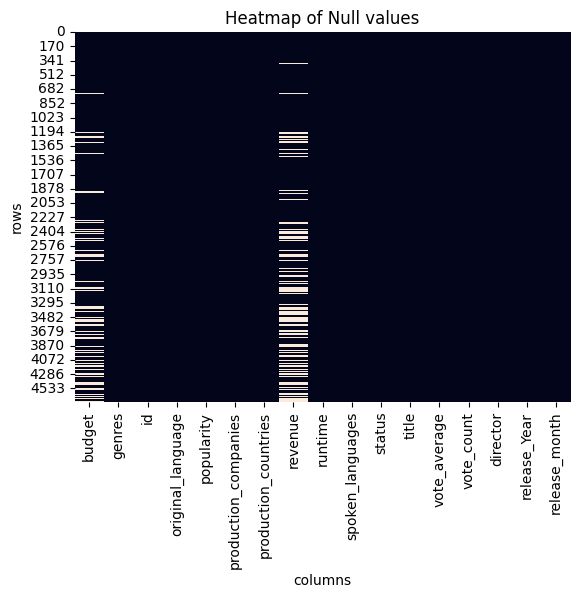

In [29]:
fig , ax = plt.subplots()
sns.heatmap(df.isnull(), cbar=False)

ax.set_title("Heatmap of Null values")
ax.set_xlabel("columns")
ax.set_ylabel("rows")

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله ما نمی‌توانیم جایگزین دقیقی برای مقادیر صفر ستون‌های runtime , revenue و budget پر کنیم زیرا اهمیت بسیار زیادی در تحلیل‌هایمان دارند و اعمال تغییرات غیر دقیق در دیتا فریم بایاس ایجاد می‌کند.
برای همین فعلا آن‌ها را در یک دیتا فریم جدا ذخیره کرده و از df حذف می‌کنیم.
    </font>
</p>

In [30]:
missing_values_df=df[(df['revenue'].isnull()) ]  # دیتافریم جدید برای مقادیر حذف شده

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 بعد از اینکه ستون درامد را پر کردیم سطرهایی که بودجه‌ی آن‌ها مفقود شده را هم در این دیتا فریم ریخته و سعی می کنیم جای خالی را پر کنیم. برای ادامه‌ی کار به بخش پر کردن داده‌های مفقودی بروید.
    </font>
</p>

In [31]:
df.dropna(subset='revenue',axis=0,inplace=True)    # حذف سطرهایی که revenue آن ها خالی است


In [32]:
df.shape

(3317, 17)

---


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color=red>
 کار با داده‌های پرت
    </font>
</p>


In [33]:
df['revenue'][df['revenue']<1000]=df['revenue'][df['revenue']<1000]*1000000  # تبدیل داده‌های پزت کوچک به داده‌هایی در رنج درست با ضرب آن ها در 1000  000
df['budget'][df['budget']<1000]=df['budget'][df['budget']<1000]*1000000  # تبدیل داده‌های پزت کوچک به داده‌هایی در رنج درست با ضرب آن ها در 1000  000

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\2690239471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'][df['revenue']<1000]=df['revenue'][df['revenue']<1000]*1000000  # تبدیل داده‌های پزت کوچک به داده‌هایی در رنج درست با ضرب آن ها در 1000  000
C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\2690239471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'][df['budget']<1000]=df['budget'][df['budget']<1000]*1000000  # تبدیل داده‌های پزت کوچک به داده‌هایی در رنج درست با ضرب آن ها در 1000  000



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 برای درک داده های پرت با ستون‌های budget و revenue و popularity شروع می‌کنیم.
    </font>
</p>


Text(0.5, 0, 'Popularity Before Droping')

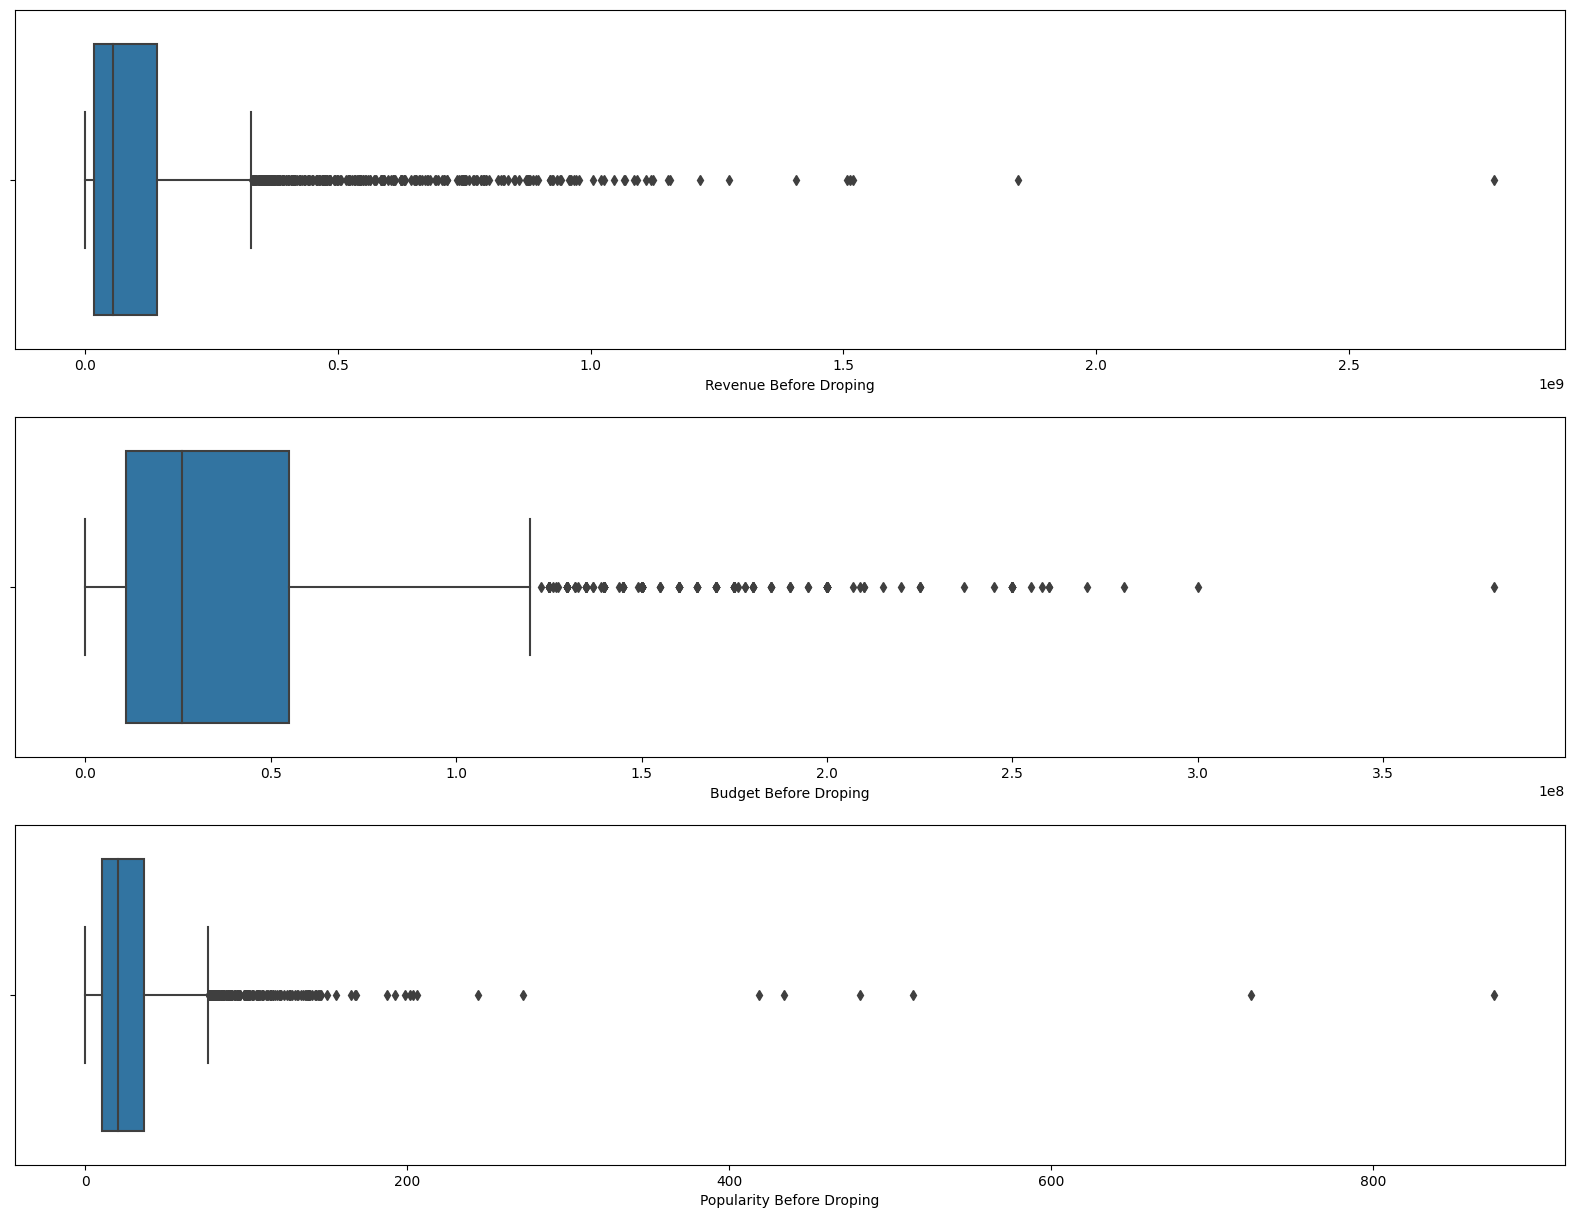

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(20,15))

sns.boxplot(x = 'revenue', data = df,ax=axes[0])
axes[0].set_xlabel('Revenue Before Droping')

sns.boxplot(x = 'budget', data = df,ax=axes[1])
axes[1].set_xlabel('Budget Before Droping')

sns.boxplot(x = 'popularity', data = df,ax=axes[2])
axes[2].set_xlabel('Popularity Before Droping')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 ستون های popularity و budget  برای من بسیار اهمیت دارد بنابراین با توجه به روش‌های موجود برای حذف داده‌های پرت ترجیح می‌دهم داده‌های این ستون‌ها را حذف نکنم
    </font>
</p>




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 اما ستون popularity اهمیت چندانی ندارد و داده‌های پرت آن کم است. برای همین با روشIQR داده‌های پرت را حذف می‌کنم.
    </font>
</p>


In [35]:
df.shape

(3317, 17)

In [36]:
'''


#حذف داده‌های پرت ستون popularity

fig, axes = plt.subplots(1, 2, figsize=(16,5))

Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1




#sns.boxplot(x = 'popularity', data = df,ax=axes[0])
#axes[0].set_xlabel('Popularity Before Droping')

df =df.drop(df[((df['revenue'] < Q1-1.5*IQR) | (df['revenue'] > Q3+1.5*IQR))].index )


#sns.boxplot(x = 'popularity', data = df,ax=axes[1],color='orange')
#axes[1].set_xlabel('Popularity After Droping')


#fig.suptitle("Droping Outliers");


'''


'\n\n\n#حذف داده\u200cهای پرت ستون popularity\n\nfig, axes = plt.subplots(1, 2, figsize=(16,5))\n\nQ1 = df[\'revenue\'].quantile(0.25)\nQ3 = df[\'revenue\'].quantile(0.75)\nIQR = Q3 - Q1\n\n\n\n\n#sns.boxplot(x = \'popularity\', data = df,ax=axes[0])\n#axes[0].set_xlabel(\'Popularity Before Droping\')\n\ndf =df.drop(df[((df[\'revenue\'] < Q1-1.5*IQR) | (df[\'revenue\'] > Q3+1.5*IQR))].index )\n\n\n#sns.boxplot(x = \'popularity\', data = df,ax=axes[1],color=\'orange\')\n#axes[1].set_xlabel(\'Popularity After Droping\')\n\n\n#fig.suptitle("Droping Outliers");\n\n\n'

In [37]:
df.shape


(3317, 17)

Text(0.5, 0, 'Popularity After Droping')

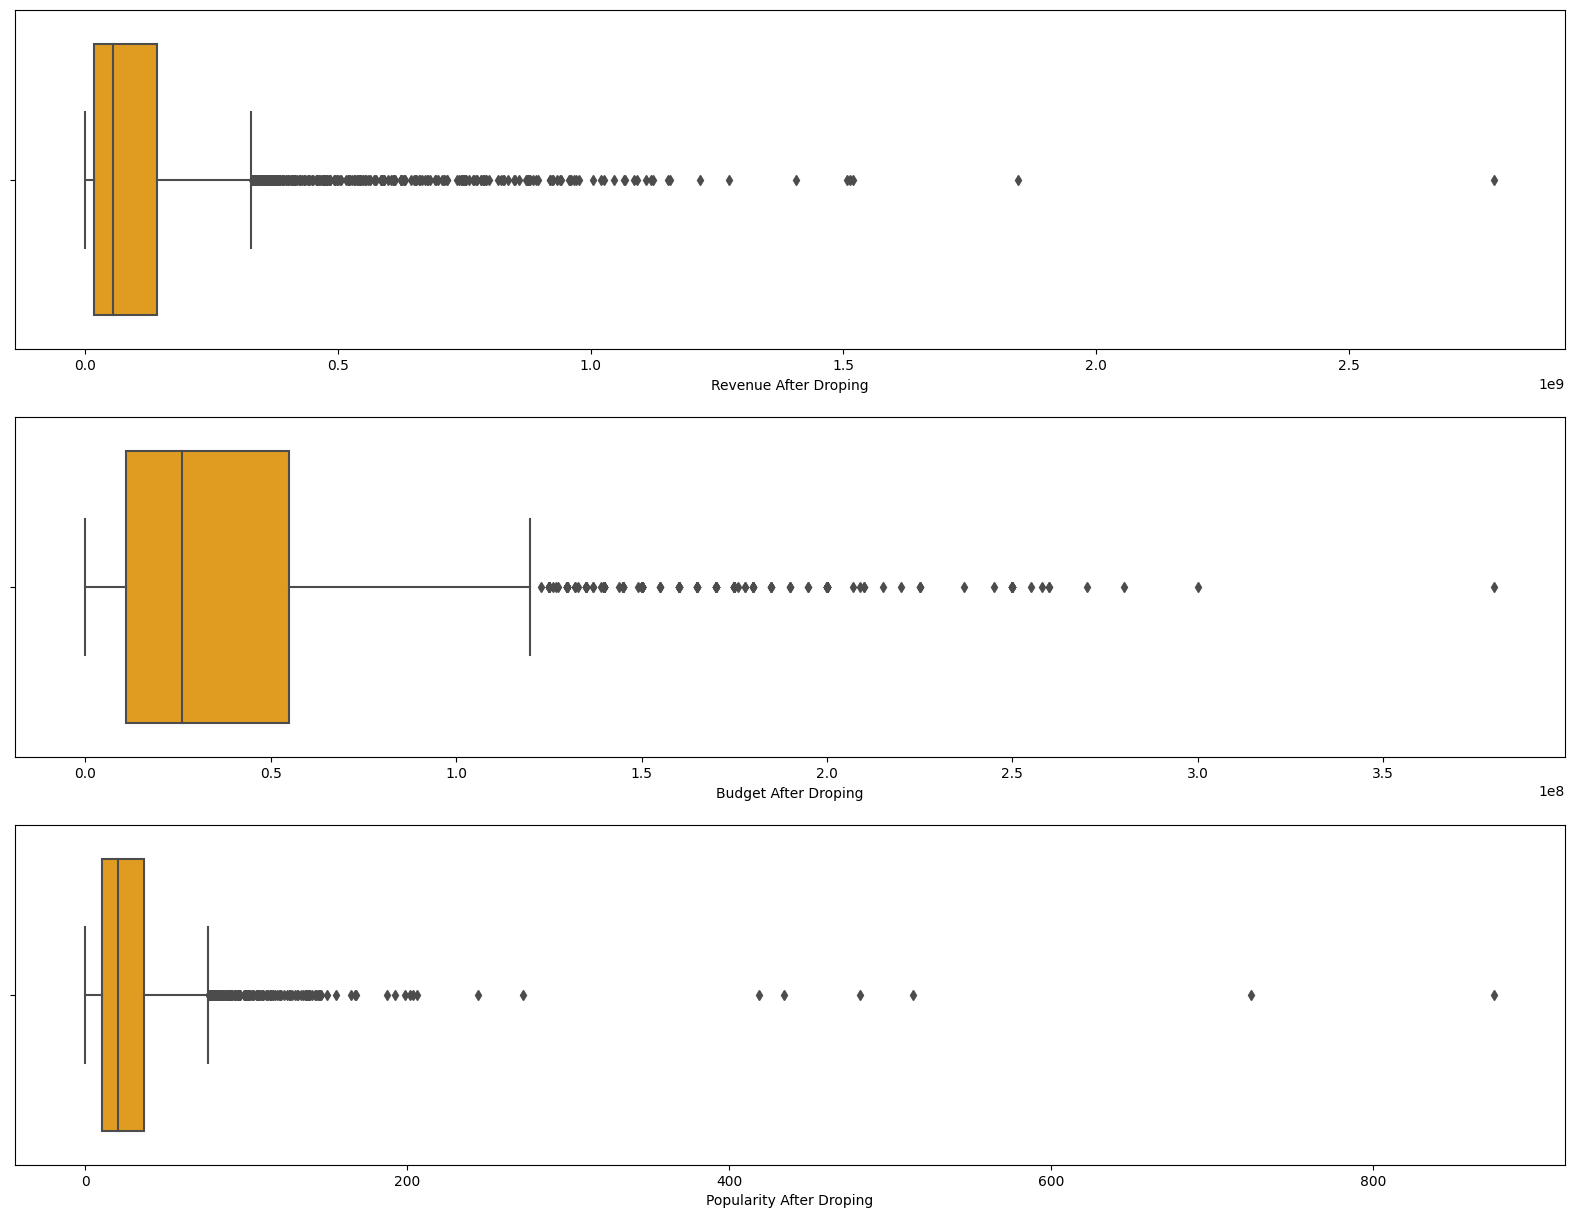

In [38]:

fig, axes = plt.subplots(3, 1, figsize=(20,15))

sns.boxplot(x = 'revenue', data = df,ax=axes[0],color='orange')
axes[0].set_xlabel('Revenue After Droping')

sns.boxplot(x = 'budget', data = df,ax=axes[1],color='orange')
axes[1].set_xlabel('Budget After Droping')

sns.boxplot(x = 'popularity', data = df,ax=axes[2],color='orange')
axes[2].set_xlabel('Popularity After Droping')


---

---


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color=red>
 پیدا کردن لیست ژانر فیلم‌ها
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 چرا ژانر فیلم‌ها برای ما مهم است؟
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 یافتن لیست ژانرها و گروه بندی داده‌ها بر اساس آن کمک می کند تا بتوانیم داده‌های مفقودی را پر کرده و به دیتا فریم برگردانیم.
  به علاوه با استفاده از آن به سوال‌های مختلفی پاسخ داد.

</font>
</p>


In [39]:
genres_df=df[['id','genres']]  # ساخت دیتا فریم جدید
genres_df

,id,genres
0,19995,action adventure fantasy sci-fi
1,285,adventure fantasy action
2,206647,action adventure crime
3,49026,action crime drama thriller
4,49529,action adventure sci-fi
...,...,...
4773,2292,comedy
4788,692,horror comedy crime
4792,36095,crime horror mystery thriller
4796,14337,sci-fi drama thriller


In [40]:
separated_genres_df=genres_df['genres'].str.split(" ", expand = True) # یک دیتا فریم که ژانرها را در هر ستون با صورت مجزا قرار دادیم 
genres_df=pd.concat([genres_df,separated_genres_df],axis=1)   # اضافه کردن دیتا فریم خط قبل به دیتا فریم ژانرها
genres_df.drop(columns='genres',inplace=True)      # حذف ستون بدون کاربرد 
genres_df

,id,0,1,2,3,4
0,19995,action,adventure,fantasy,sci-fi,None
1,285,adventure,fantasy,action,None,None
2,206647,action,adventure,crime,None,None
3,49026,action,crime,drama,thriller,None
4,49529,action,adventure,sci-fi,None,None
...,...,...,...,...,...,...
4773,2292,comedy,None,None,None,None
4788,692,horror,comedy,crime,None,None
4792,36095,crime,horror,mystery,thriller,None
4796,14337,sci-fi,drama,thriller,None,None


In [41]:
#ساخت لیستی از ژانر فیلم‌ها

genres_list=[]
for i in range(len(genres_df)):
    for j in range(1,6):
        genres_list.append(genres_df.iloc[i,j]) 

genres_list = list(set(genres_list))   # حذف داده‌های تکراری
genres_list.remove(None)  # حذف None
genres_list

['mystery',
 'war',
 'sci-fi',
 'fantasy',
 'foreign',
 'crime',
 'romance',
 'action',
 'horror',
 'family',
 'documentary',
 'history',
 'music',
 'thriller',
 'drama',
 'comedy',
 'western',
 'animation',
 'adventure']

---

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color=red>
 پر کردن داده‌های مفقود شده
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در این روش برای پر کردن ستون درآمد و بودجه ابتدا ژانر فیلم‌ها را مرتب کنیم تا ببینیم کدام‌ ژانرها بیشتر تکرار شده اند و به همین ترتیب آن را مرتب کنیم
    </font>
</p>


In [42]:
# این تابع تعداد فیلم‌های ساخته شده در هر ژانر را به همراه اسم آن ژانر در یک دیتافریم ذخیره می‌کند

def common_genre(x):   # x: لیست نام ژانرها 
    common_genre=pd.DataFrame()
    common_genre.index=x
    common_genre['count']=None
    for i in range(len(x)):
        common_genre['count'][i]=len(df.loc[df['genres'].str.contains(x[i])])
    return common_genre

In [43]:
x=genres_list # لیست نام ژانرها که در قسمت آماده‌سازی داده آن را ساختیم
common_genre_df=common_genre(x)  #استفاده از تابع

In [44]:
common_genre_df=common_genre_df.sort_values(['count'],ascending=False)
common_genre_df

,count
drama,1496
comedy,1145
thriller,940
action,929
adventure,669
romance,590
crime,534
sci-fi,432
family,375
fantasy,345


In [45]:
genres_list=list(common_genre_df.index)  # حال به ترتیب از بیشترین تکرار به کمترین تکرار ذخیره می‌کنیم
genres_list

['drama',
 'comedy',
 'thriller',
 'action',
 'adventure',
 'romance',
 'crime',
 'sci-fi',
 'family',
 'fantasy',
 'horror',
 'mystery',
 'animation',
 'history',
 'war',
 'music',
 'western',
 'documentary',
 'foreign']

In [46]:
missing_values_df.head(2) # دیتا فریم داده‌های مفقود شده

,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,director,release_Year,release_month
83,27000000.0,action adventure sci-fi romance,79698,en,2.418535,"[{""name"": ""corsan"", ""id"": 7299}, {""name"": ""bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",NaN,109.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",Released,the lovers,4.8,34,roland joff\u00e9,2015.0,2.0
135,150000000.0,drama horror thriller,7978,en,21.214571,"[{""name"": ""universal pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",NaN,102.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",Released,the wolfman,5.5,549,joe johnston,2010.0,2.0


In [47]:
missing_values_df.shape

(1090, 17)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 از پر تعداد‌ترین ژانر که درام است شروع می‌کنیم و داده‌های مفقود را با میانگین این دسته‌ها پر می کنیم
    </font>
</p>


In [48]:
# این تابع مقادیر مفقودی ستون درآمد را پر می‌کند

def filling_revenue_missing_values(x,missing_values_df,df): #x: لیست ژانرها است
    ff=pd.DataFrame()
    for i in x:
        ff = missing_values_df.loc[missing_values_df['genres'].str.contains(i)] #ساخت دیتا فریم با ژانر i 
        
        missing_values_df.drop(ff.index,inplace=True)  # حذف ستون‌هایی که می‌خواهیم پرشان کنیم از دیتافریم داده‌های مفقودی
        
        ff_mean=df.loc[df['genres'].str.contains(i)]['revenue'].mean()  # پیدا کردن میانگین ژانر i
        
        ff['revenue']=ff_mean  # پر کردن ستون با میانگین خط قبلی
        
        df=pd.concat([df,ff],axis=0) # اضافه‌کردن داده‌هایی که پرشان کردیم به دیتافریم اصلی
        
    return df

In [49]:
df=filling_revenue_missing_values(genres_list,missing_values_df,df)

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3156816528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df.drop(ff.index,inplace=True)  # حذف ستون‌هایی که می‌خواهیم پرشان کنیم از دیتافریم داده‌های مفقودی
C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3156816528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff['revenue']=ff_mean  # پر کردن ستون با میانگین خط قبلی


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 همین روند را برای مقادیر مفقود ستون بودجه هم انجام می‌دهیم
    </font>
</p>


In [50]:
missing_values_df=df[(df['budget'].isnull()) ]  # دیتافریم جدید برای مقادیر حذف شده

In [51]:
df.dropna(subset='budget',axis=0,inplace=True)     # حذف سطرهایی که budget آن ها خالی است

In [52]:
# این تابع مقادیر مفقودی ستون بودجه را پر می‌کند


def filling_budget_missing_values(x,missing_values_df,df): #x: لیست ژانرها است
    ff=pd.DataFrame()
    for i in x:
        hh = missing_values_df.loc[missing_values_df['genres'].str.contains(i)] #ساخت دیتا فریم با ژانر i 
        
        missing_values_df.drop(hh.index,inplace=True)  # حذف ستون‌هایی که می‌خواهیم پرشان کنیم از دیتافریم داده‌های مفقودی
        
        hh_mean=df.loc[df['genres'].str.contains(i)]['budget'].mean()  # پیدا کردن میانگین ژانر i
        
        hh['budget']=hh_mean  # پر کردن ستون با میانگین خط قبلی
        
        df=pd.concat([df,hh],axis=0) # اضافه‌کردن داده‌هایی که پرشان کردیم به دیتافریم اصلی
        
    return df

In [53]:
df=filling_budget_missing_values(genres_list,missing_values_df,df)

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3172299111.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df.drop(hh.index,inplace=True)  # حذف ستون‌هایی که می‌خواهیم پرشان کنیم از دیتافریم داده‌های مفقودی
C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3172299111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['budget']=hh_mean  # پر کردن ستون با میانگین خط قبلی


---

In [54]:
total_null=df.isnull().sum()
total_null=total_null[total_null>0]
total_null

Series([], dtype: int64)

---

## <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=4 color=red> پیدا کردن لیست کمپانی‌ها </font></p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 لیست کمپانی‌ها در تحلیل‌های آینده لازم است.
    </font>
</p>

In [55]:
df_production_companies=df[['id','production_companies']]  # ساخت دیتا فریم جدید
df_production_companies

,id,production_companies
0,19995,"[{""name"": ""ingenious film partners"", ""id"": 289..."
1,285,"[{""name"": ""walt disney pictures"", ""id"": 2}, {""..."
2,206647,"[{""name"": ""columbia pictures"", ""id"": 5}, {""nam..."
3,49026,"[{""name"": ""legendary pictures"", ""id"": 923}, {""..."
4,49529,"[{""name"": ""walt disney pictures"", ""id"": 2}]"
...,...,...
4616,87943,"[{""name"": ""vixen films"", ""id"": 82784}]"
4685,126141,"[{""name"": ""les films du jeudi"", ""id"": 54259}]"
4711,178862,"[{""name"": ""cherry on top"", ""id"": 20757}]"
4731,80215,"[{""name"": ""blinkworks media"", ""id"": 84489}]"


In [56]:
df_production_companies['production_companies']=df_production_companies['production_companies'].str.replace('[','')\
    .str.replace(']','').str.replace('{','')  # حذف کاراکترهای اضافی
separated_df_production_companies=df_production_companies['production_companies'].str.split("},", expand = True)  #تجزیه‌ی ستون اسم کمپانی‌ها و ذخیره‌ی آن در دیتا فریم جدید

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3391910124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_companies['production_companies']=df_production_companies['production_companies'].str.replace('[','')\


In [57]:
df_production_companies=df_production_companies.drop(columns='production_companies')  # حذف ستون بدون کاربرد
df_production_companies=pd.concat([df_production_companies,separated_df_production_companies],axis=1)    # اضافه کردن دیتا فریم کد به دیتا فریم کمپانی  


for i in range(0,26):
    df_production_companies[i]=df_production_companies[i].str.replace('}','') #جدا کردن کمپانی‌ها از هم  قرار دادن هر کدام در ستون‌های مجزا

df_production_companies

,id,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,19995,"""name"": ""ingenious film partners"", ""id"": 289","""name"": ""twentieth century fox film corporati...","""name"": ""dune entertainment"", ""id"": 444","""name"": ""lightstorm entertainment"", ""id"": 574",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,285,"""name"": ""walt disney pictures"", ""id"": 2","""name"": ""jerry bruckheimer films"", ""id"": 130","""name"": ""second mate productions"", ""id"": 19936",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,206647,"""name"": ""columbia pictures"", ""id"": 5","""name"": ""danjaq"", ""id"": 10761","""name"": ""b24"", ""id"": 69434",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,49026,"""name"": ""legendary pictures"", ""id"": 923","""name"": ""warner bros."", ""id"": 6194","""name"": ""dc entertainment"", ""id"": 9993","""name"": ""syncopy"", ""id"": 9996",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,49529,"""name"": ""walt disney pictures"", ""id"": 2",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,87943,"""name"": ""vixen films"", ""id"": 82784",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4685,126141,"""name"": ""les films du jeudi"", ""id"": 54259",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4711,178862,"""name"": ""cherry on top"", ""id"": 20757",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4731,80215,"""name"": ""blinkworks media"", ""id"": 84489",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [58]:
df_production_companies_new=df_production_companies['id']  # ساخت دیتا فریم جدید با تجزیه‌ی آیدی هر کمپانی از اسمش

# حذف کاراکترهای اضافی
for j in range(0,26):
    aa=df_production_companies[j].str.split('", "',expand=True)
    aa[0]=aa[0].str.replace('"name":','').str.replace('"','')
    aa[1]=aa[1].str.replace('id":','')
    
    df_production_companies_new=pd.concat([df_production_companies_new,aa],axis=1)



df_production_companies_new.columns=[*range(0,53)]   # عوض کردن اسم ستون‌ها
df_production_companies_new.rename({0: 'id'}, inplace=True)  #تغیر اسم ستون صفر به تایتل 

df_production_companies_new

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
id,19995,ingenious film partners,289,twentieth century fox film corporation,306,dune entertainment,444,lightstorm entertainment,574,None,...,None,None,None,None,None,None,None,None,None,None
1,285,walt disney pictures,2,jerry bruckheimer films,130,second mate productions,19936,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,206647,columbia pictures,5,danjaq,10761,b24,69434,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,49026,legendary pictures,923,warner bros.,6194,dc entertainment,9993,syncopy,9996,None,...,None,None,None,None,None,None,None,None,None,None
4,49529,walt disney pictures,2,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,87943,vixen films,82784,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4685,126141,les films du jeudi,54259,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4711,178862,cherry on top,20757,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4731,80215,blinkworks media,84489,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [59]:
#این تابع مقادیر یکتا را از دیتا فریم کد قبل بیرون می‌کشد و در خروجی یک مجموعه از نام کمپانی‌ها می‌دهد

def find_uniq_company():
    company_set=set()
    for i in range(1,53,2):
        x=df_production_companies_new[i].unique()
        company_set=company_set.union(x)
    return company_set


company_set=find_uniq_company()  # استفاده از تابع
company_list=list(company_set)   # تبدیل مجموعه به لیست
company_list = list(map(str, company_list)) # تبدیل اعضای لیست به رشته
company_list=[x.strip() for x in company_list]  # حذف اسپیس‌های اول هر رشته
company_list

['kouf/bigelow productions',
 'new line cinema',
 'das kleine fernsehspiel (zdf)',
 'hal films',
 'paul schiff productions',
 'the fourth production company film group',
 'lazio film commission',
 'beijing new picture film co. ltd.',
 'rhythm and hues',
 'shallow focus',
 'weinstein company, the',
 'samuel bronston productions',
 'danjaq',
 'netflix',
 'skydance productions',
 'green hat films',
 'fox 2000 pictures',
 'pacific title and art studio',
 'killer films',
 'outlaw productions',
 'head gear films',
 'cranium films',
 'thinkfilm',
 'level 1 entertainment',
 'next entertainment',
 'lotus entertainment (i)',
 '26 films',
 'brick dust productions llc',
 'universal cartoon studios',
 'island film group',
 'cambridge productions',
 'av pictures',
 'craven-maddalena films',
 'maloof motion pictures',
 'vivendi',
 'blue train productions',
 'steamroller productions',
 'moho films',
 'cinema seven productions',
 'silver screen pictures',
 'left field ventures',
 'blue sky studios',
 '

---

## <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=4 color=red> پیدا کردن لیست زبان اصلی فیلم‌ها و زبان دوبله‌ی آن‌ها </font></p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در این دیتا فریم دو ستون مربوط به زبان داریم.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 ستون original_language مربوط به زبانی است که فیلم با آن ساخته شده.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 ستون spoken_languages مربوط به زبان‌هایی است که فیلم به آن‌ها دوبله شده.
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 یافتن لیست این زبان‌ها در تحلیل‌های آینده بسیار لازم است.
    </font>
</p>


In [60]:
original_language_list=list(df['original_language'].unique()) # ساخت لیست زبان‌های اصلی فیلم‌ها
original_language_list

['en',
 'ja',
 'fr',
 'zh',
 'ko',
 'te',
 'ru',
 'de',
 'cn',
 'es',
 'it',
 'nl',
 'th',
 'da',
 'xx',
 'hi',
 'is',
 'nb',
 'pt',
 'af',
 'pl',
 'he',
 'id',
 'ro',
 'no',
 'fa',
 'sv',
 'tr',
 'ps',
 'el',
 'ta',
 'ar',
 'ky',
 'sl']


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 حال به بررسی زبان دوبله‌ی فیلم‌ها می‌پردازیم
    </font>
</p>


In [61]:
spoken_language=df[['id','spoken_languages']]# ساخت دیتا فریم جدید با زبان دوبله‌ی فیلم‌ها
spoken_language

,id,spoken_languages
0,19995,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso..."
1,285,"[{""iso_639_1"": ""en"", ""name"": ""english""}]"
2,206647,"[{""iso_639_1"": ""fr"", ""name"": ""français""}, {""is..."
3,49026,"[{""iso_639_1"": ""en"", ""name"": ""english""}]"
4,49529,"[{""iso_639_1"": ""en"", ""name"": ""english""}]"
...,...,...
4616,87943,"[{""iso_639_1"": ""en"", ""name"": ""english""}]"
4685,126141,"[{""iso_639_1"": ""fr"", ""name"": ""français""}]"
4711,178862,"[{""iso_639_1"": ""en"", ""name"": ""english""}]"
4731,80215,"[{""iso_639_1"": ""en"", ""name"": ""english""}]"


In [62]:
spoken_language['spoken_languages']=spoken_language['spoken_languages'].str.replace('[','').str.replace(']','').str.replace('{','')# حذف کاراکتر‌های اضافی
spoken_language_separated=spoken_language['spoken_languages'].str.split("},", expand = True)  #جدا کردن زبان‌ها از هم و قرار دادن هر کدام در ستون‌های مجزا 


for i in range(0,8):
    spoken_language_separated[i]=spoken_language_separated[i].str.replace('}','')  # حذف کاراکتر‌های اضافی

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3823885219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spoken_language['spoken_languages']=spoken_language['spoken_languages'].str.replace('[','').str.replace(']','').str.replace('{','')# حذف کاراکتر‌های اضافی


In [63]:
spoken_language_new=pd.DataFrame() # ساخت دیتا فریم جدید برای اسم هر زبان و مخف‌هایش
spoken_language_new=spoken_language['id']


# حذف کاراکتر های اضافی
for j in range(0,8):
    cc=spoken_language_separated[j].str.split('", "',expand=True)
    cc[0]=cc[0].str.replace('"iso_639_1":','').str.replace('"','')
    cc[1]=cc[1].str.replace('name": "','').str.replace('"','')
    
    spoken_language_new=pd.concat([spoken_language_new,cc],axis=1)


spoken_language_new.columns=[*range(0,17)]   # عوض کردن اسم ستون‌ها
spoken_language_new.rename(columns={0: 'id'}, inplace=True)  #تغیر اسم ستون صفر به تایتل 

spoken_language_new

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,19995,en,english,es,español,None,None,None,None,None,None,None,None,None,None,None,None
1,285,en,english,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,206647,fr,français,en,english,es,español,it,italiano,de,deutsch,None,None,None,None,None,None
3,49026,en,english,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,49529,en,english,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,87943,en,english,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4685,126141,fr,français,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4711,178862,en,english,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4731,80215,en,english,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [64]:
#این تابع مقادیر یکتا را از دیتا فریم کد قبل بیرون می‌کشد و در خروجی یک مجموعه از نام زبان‌ها می‌دهد


def find_uniq_language():
    language_set=set()
    for i in range(2,18,2):
        x=spoken_language_new[i].unique()
        language_set=language_set.union(x)
    return language_set



language_set=find_uniq_language() # فراخوانی تابع
language_set.remove('') # حذف فاصله از اعضای لیست
language_set.remove(None) #  حذف مقادیر None
language_set

{'??????',
 'afrikaans',
 'bahasa indonesia',
 'bamanankan',
 'bosanski',
 'català',
 'cymraeg',
 'dansk',
 'deutsch',
 'eesti',
 'english',
 'español',
 'esperanto',
 'français',
 'gaeilge',
 'galego',
 'hrvatski',
 'isizulu',
 'italiano',
 'kiswahili',
 'latin',
 'magyar',
 'nederlands',
 'no language',
 'norsk',
 'polski',
 'português',
 'pусский',
 'română',
 'shqip',
 'slovenčina',
 'slovenščina',
 'somali',
 'srpski',
 'suomi',
 'svenska',
 'tiếng việt',
 'türkçe',
 'wolof',
 'Íslenska',
 'Český',
 'ελληνικά',
 'Український',
 'български език',
 'қазақ',
 'עִבְרִית',
 'اردو',
 'العربية',
 'فارسی',
 'پښتو',
 'हिन्दी',
 'বাংলা',
 'ਪੰਜਾਬੀ',
 'தமிழ்',
 'తెలుగు',
 'ภาษาไทย',
 'ქართული',
 '广州话 / 廣州話',
 '日本語',
 '普通话',
 '한국어/조선말'}

---

## <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=4 color=red> پیدا کردن لیست نام کارگردان‌ها</font></p>


In [65]:
directors_name_list=df['director'].unique()
directors_name_list

array(['james cameron', 'gore verbinski', 'sam mendes', ...,
       'deborah anderson', 'lisanne pajot', 'brian herzlinger'],
      dtype=object)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در آخر یک ستون جدید به نام profit ایجاد می کنیم که سود بدست آمده از فروش هر فیلم در آن ذخیره می‌شود.
    </font>
</p>

In [66]:



df['profit']=df['revenue']-df['budget']

---

---

<a id="3"></a>
# <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=6> مرحله‌ی سوم: تحلیل‌ داده‌ها و پاسخ به سوالات    </font> </p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در این پروژه من فرض کرده‌ام که به عنوان تحلیلگر داده در یک شرکت سرمایه‌گذاری استخدام شده‌ام.
کار این شرکت، سرمایه‌گذاری روی فیلم‌های سینمایی است و من قرار است با تحلیل داده‌ها موقعیت‌های مناسب برای سرمایه‌گذاری را پیدا کنم.
    </font>
</p>


---



<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=10>
 HBO اطلاعات شرکت 
</font>
</h1>

In [67]:
hbo_company=df.loc[df['production_companies'].str.contains('hbo')]

In [122]:
hbo_company[['budget','revenue','profit','vote_average','popularity','runtime','release_Year']].describe().drop(index=['25%','50%','75%','std','count']).style.highlight_min(color='green')

,budget,revenue,profit,vote_average,popularity,runtime,release_Year
mean,34071667.229587,128307158.381684,94235491.152097,6.100000,14.995241,106.125000,2005.875000
min,5000000.000000,258384.000000,-37350255.082676,5.100000,2.711955,90.000000,1987.000000
max,100000000.000000,368744044.000000,363744044.000000,6.900000,30.131498,146.000000,2016.000000


In [69]:
hbo_company[['budget','revenue','profit','vote_average','popularity','runtime','release_Year']].describe().drop(index=['25%','50%','75%','std','count']).style.highlight_max(color='orange')

,budget,revenue,profit,vote_average,popularity,runtime,release_Year
mean,34071667.229587,128307158.381684,94235491.152097,6.100000,14.995241,106.125000,2005.875000
min,5000000.000000,258384.000000,-37350255.082676,5.100000,2.711955,90.000000,1987.000000
max,100000000.000000,368744044.000000,363744044.000000,6.900000,30.131498,146.000000,2016.000000


---


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 رابطه‌ی بین متغیر‌های عددی چگونه است؟
    </font>
</p>


In [70]:

#ستون‌هایی که داده های عددی دارند
numerical_variables=df.columns[df.dtypes!='object']
numerical_variables=numerical_variables.drop('id')


In [71]:

# creating mask
mask = np.triu(np.ones_like(df[numerical_variables].corr()))


<Axes: >

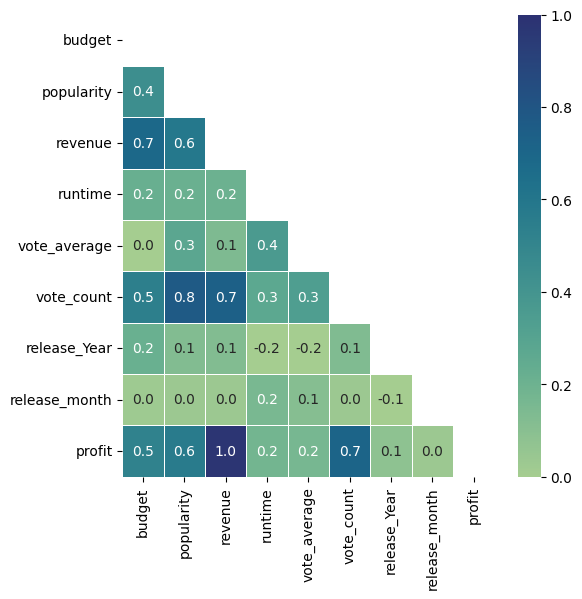

In [72]:
fig , ax=plt.subplots(figsize=(6,6))

sns.heatmap(df[numerical_variables].corr(), annot=True, ax=ax, linewidth=.5 ,fmt=".1f",cmap="crest" , mask=mask,vmin=0,vmax=1)


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 طبق نمودار متغیرهای profit , revenue رابطه ی کاملا خطی دارند. که این موضوع بدیهی است. زیرا مقدار سود به کمک مقدار درامد محاسبه می‌شود.
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 متغیرهای vote_count و popularity همبستگی زیادی دارند و این موضوع هم کاملا روشن است، هرچه تعداد افرادی که رای میدهند بیشتر باشد محبوبیت فیلم نیز بیشتر می‌شود.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 متغیرهای vote_count و revenue همبستگی حدودا 0.7 دارند.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 متغیرهای vote_count و profit همبستگی حدودا 0.7 دارند.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 متغیرهای budget و revenue همبستگی حدودا 0.7 دارند.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 متغیرهای popularity و revenue همبستگی حدودا 0.6 دارند.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 متغیرهای popularity و profit همبستگی حدودا 0.6 دارند.
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 بین متغیرهای budget (یا همان هزینه‌های هر فیلم) و popularity همبستگی حدودا 0.4 وجود دارد و این کم است.
    </font>
</p>

---



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 موفقیت یک فیلم‌ به چه معناست؟
    </font>
</p>




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 طبق سیاست‌های این شرکت فیلمی موفق است که سودآوری داشته باشد.
    </font>
</p>

In [73]:
df.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,director,release_Year,release_month,profit
0,237000000.0,action adventure fantasy sci-fi,19995,en,150.437577,"[{""name"": ""ingenious film partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",Released,avatar,7.2,11800,james cameron,2009.0,12.0,2.550965e+09
1,300000000.0,adventure fantasy action,285,en,139.082615,"[{""name"": ""walt disney pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",Released,pirates of the caribbean: at world's end,6.9,4500,gore verbinski,2007.0,5.0,6.610000e+08


In [74]:
df[df['title']=='avatar']

,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,director,release_Year,release_month,profit
0,237000000.0,action adventure fantasy sci-fi,19995,en,150.437577,"[{""name"": ""ingenious film partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",Released,avatar,7.2,11800,james cameron,2009.0,12.0,2.550965e+09


In [75]:
df_successful=df[['title','profit', 'revenue','budget']]  #یک دیتا فریم برای معرفی فیلم‌های موفق می‌سازیم

df_successful=df_successful.sort_values('profit',ascending=False)  # دیتا فریم را از سود بیشتر به کمتر مرتب می‌کنیم
df_successful.reset_index(inplace=True)
df_successful.drop(columns='index',inplace=True)
df_successful

,title,profit,revenue,budget
0,avatar,2.550965e+09,2.787965e+09,237000000.0
1,titanic,1.645034e+09,1.845034e+09,200000000.0
2,jurassic world,1.363529e+09,1.513529e+09,150000000.0
3,furious 7,1.316249e+09,1.506249e+09,190000000.0
4,the avengers,1.299558e+09,1.519558e+09,220000000.0
...,...,...,...,...
4402,the adventures of pluto nash,-9.289603e+07,7.103973e+06,100000000.0
4403,the 13th warrior,-9.830110e+07,6.169890e+07,160000000.0
4404,mars needs moms,-1.110072e+08,3.899276e+07,150000000.0
4405,the alamo,-1.191800e+08,2.581996e+07,145000000.0


Text(0.5, 1.0, '10 Highest Grossing Movies')

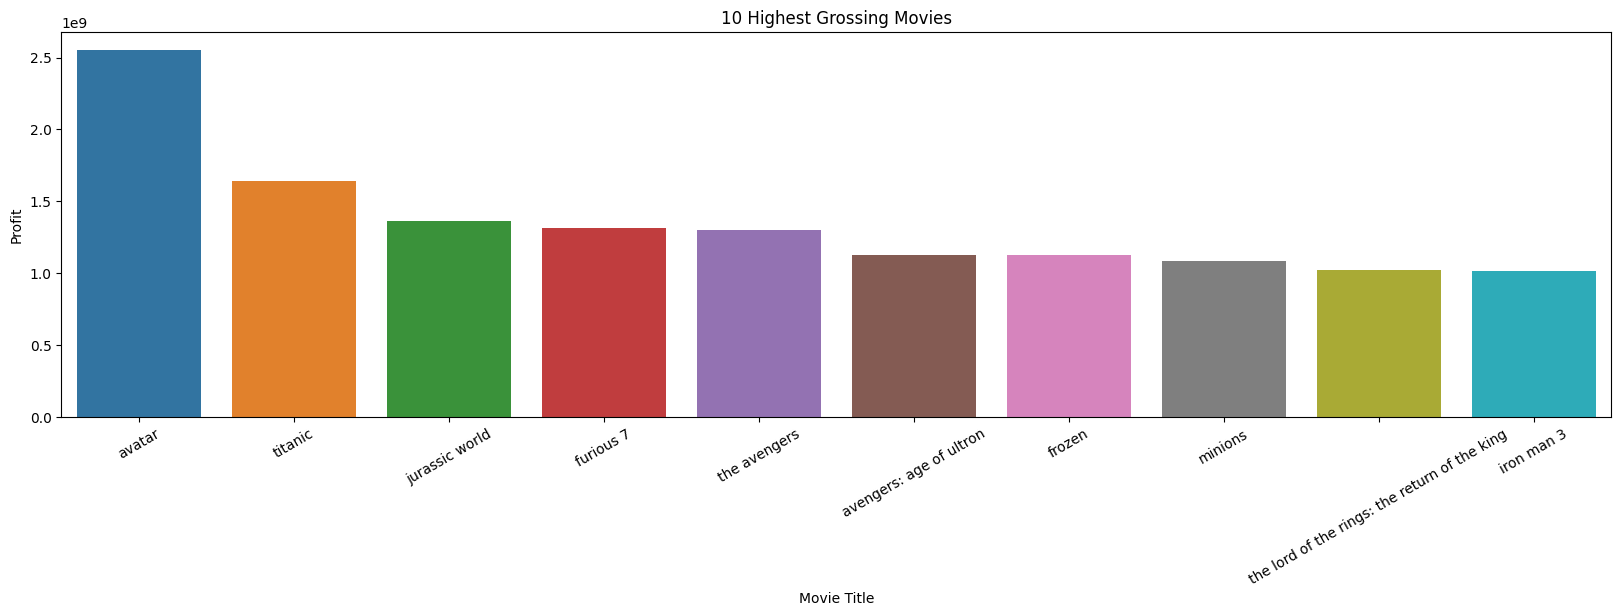

In [76]:
fig, ax=fig, axes = plt.subplots(figsize=(20,5))
sns.barplot(data=df_successful[0:10], x="title", y="profit",ax=ax)


ax.set_xticklabels(labels=df_successful["title"][0:10], rotation=30)
ax.set_xlabel('Movie Title')
ax.set_ylabel('Profit');
ax.set_title('10 Highest Grossing Movies')

---


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 معمولا فیلم‌ها در چه ژانر‌هایی ساخته می شوند؟ 
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در بخش پر کردن مقادیر مفقود در مورد روش بدست آوردن تعداد فیلم‌های هر ژانر نوشتیم ولی باید مجدد محاسبات انجام شود تا داده‌هایی که به دیتا فریم اضافه کردیم نیز طبقه بندی گردد
    </font>
</p>


In [77]:
# این تابع تعداد فیلم‌های ساخته شده در هر ژانر را به همراه اسم آن ژانر در یک دیتافریم ذخیره می‌کند

def common_genre(x,df):   # x: لیست نام ژانرها 
    common_genre=pd.DataFrame()
    common_genre.index=x
    common_genre['count']=None
    for i in range(len(x)):
        common_genre['count'][i]=len(df.loc[df['genres'].str.contains(x[i])])
    return common_genre

In [78]:
x=genres_list # لیست نام ژانرها که در قسمت آماده‌سازی داده آن را ساختیم
common_genre_df=common_genre(x,df)  #استفاده از تابع

In [79]:
common_genre_df=common_genre_df.sort_values(['count'],ascending=False)
common_genre_df

,count
drama,2099
comedy,1577
thriller,1203
action,1108
romance,818
adventure,772
crime,675
sci-fi,511
horror,485
family,482


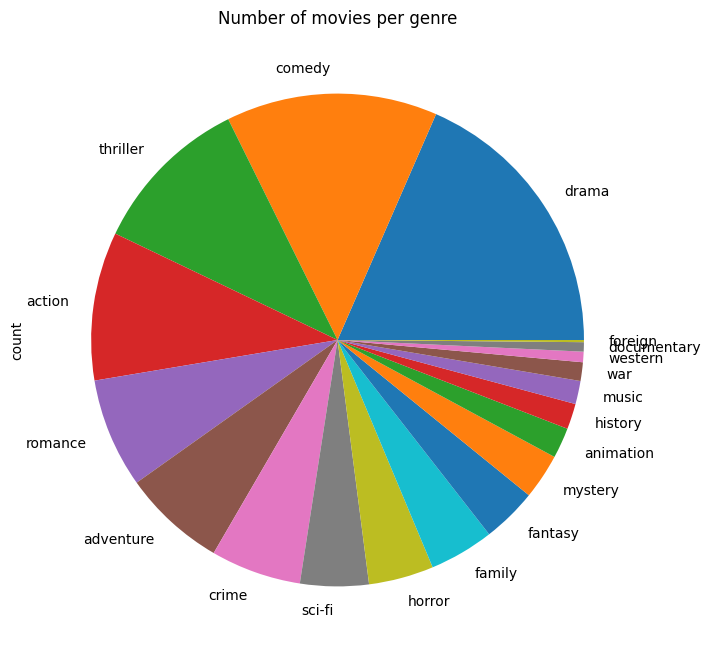

In [80]:
common_genre_df.plot(kind ='pie',figsize=(15,8),legend=False, subplots = True)
plt.title('Number of movies per genre')


plt.show()



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 طبق نمودار ژانر درام با 2102 فیلم بیشترین تعداد ساخت را داشته و بعد از ان کمدی با 1577 فیلم، ژانرهای رایج هستند
    </font>
</p>


---



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 به طور میانگین‌ زمان فیلم‌ها چه قدر طول می‌کشد؟
    </font>
</p>


In [81]:
runtime_mean=df['runtime'].mean()
runtime_mean

108.32425686407987

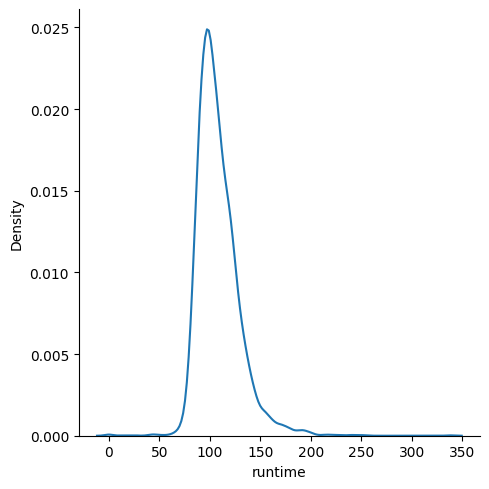

In [82]:
sns.displot(df['runtime'], kind='kde')



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 فیلم‌ها به طور میانگین حدود 107.55 دقیقه زمان می‌برند.
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 آیا طول زمان فیلم روی موفقیت آن تاثیر دارد؟
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 طبق سیاست‌های شرکت فیلمی موفق است که سود بیشتری داشته باشد موفق‌تر است. بنابراین برای یافتن پاسخ این سوال همبستگی ستون profit و runtime را بررسی میکنیم
    </font>
</p>


In [83]:
c = np.corrcoef(df['profit'],df['runtime'])
c

array([[1.        , 0.17692699],
       [0.17692699, 1.        ]])





<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 همانطور که مشاهده می‌شود مقدار همبستگی 0.09 است و این بدان معناست که حدود همبستگی بین این دو پارامتر وجود ندارد
    </font>
</p>


<Axes: xlabel='runtime', ylabel='profit'>

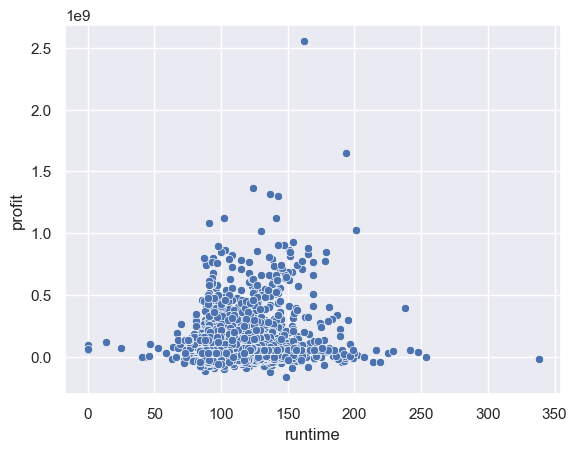

In [84]:
sns.set_theme()
sns.scatterplot(data=df, y="profit", x="runtime")



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 با افزایش زمان فیلم  سوددهی آن کاهش می‌یابد.
    </font>
</p>


---

---



<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=10>دموکراسی در صنعت سینما</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 فیلم‌ها در کدام زبان محبوبیت بیشتری دارند؟
    </font>
</p>


In [85]:
def popularity_of_each_language(x):   # x: لیست زبان‌های اصلی است
    language_popularity=pd.DataFrame()
    language_popularity.index=x
    language_popularity['mean_of_popularity']=None

    for i in x:
        language_popularity['mean_of_popularity'][i]=df.loc[df['original_language'].str.contains(i)]['popularity'].mean()

        
    return language_popularity



In [86]:
popularity=popularity_of_each_language(original_language_list).sort_values(['mean_of_popularity'],ascending=False)
popularity

,mean_of_popularity
el,28.858238
ja,25.663788
id,24.586253
en,23.971778
it,22.551238
ko,19.48872
da,17.663925
te,16.254032
es,14.630375
pl,13.265432


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 فیلم‌های زبان یونانی با میانگین محبوبیت 28.858238 بیشترین محبوبیت را دارد.
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
زبان انگلیسی با میانگین محبوبیت 23.955011 در جایگاه چهارم است.
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 آیا رتبه‌ بندی فیلم مبنای انتخاب مردم است؟
    </font>
</p>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای آنکه رابطه‌ی بین محبوبیت و رتبه بندی را مشخص کنیم از کرولیشن استفاده می‌کنیم
    </font>
</p>


In [87]:
# محاسبه‌ی کرولیشن از روش پیرسون

corolation = np.corrcoef(df['popularity'],df['budget'])
corolation

array([[1.        , 0.44153223],
       [0.44153223, 1.        ]])

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده می‌کنید هر دو روش مقادیر حدودا یکسانی را نشان می‌دهد.
با توجه به اینکه این مقادیر کمتر از 0.5 هستند، رابطه‌ی زیادی با هم ندارند.
    </font>
</p>


Text(0, 0.5, 'vote')

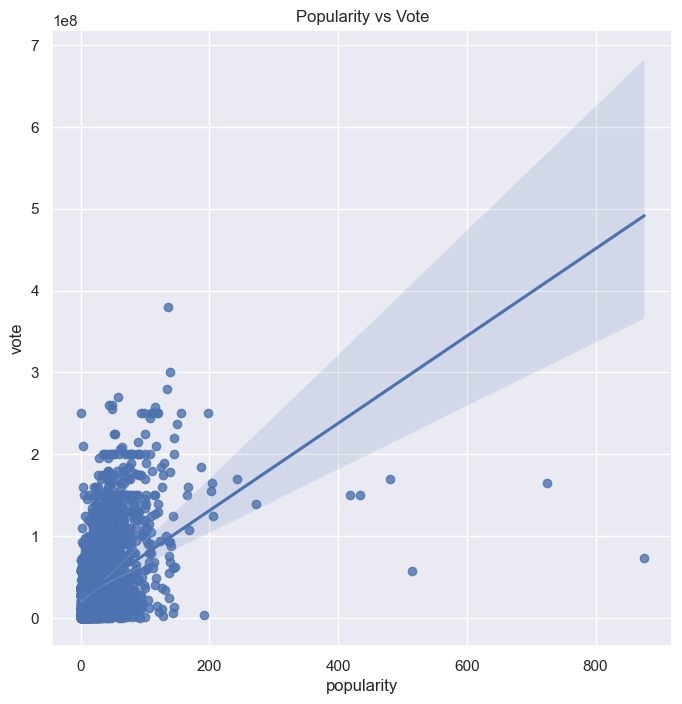

In [88]:
sns.set_theme()

fig , ax = plt.subplots(figsize=(8,8))


sns.regplot(x='popularity', y='budget', data=df, ax= ax);

ax.set_title("Popularity vs Vote")
ax.set_xlabel("popularity")
ax.set_ylabel("vote")

---

---

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=10>
سال‌های پربرکت !
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 فروش در چه سال‌هایی بیشتر بوده؟
    </font>
</p>


In [89]:
revenue_by_year=df[['title','genres','release_Year','revenue']]
revenue_by_year

,title,genres,release_Year,revenue
0,avatar,action adventure fantasy sci-fi,2009.0,2.787965e+09
1,pirates of the caribbean: at world's end,adventure fantasy action,2007.0,9.610000e+08
2,spectre,action adventure crime,2015.0,8.806746e+08
3,the dark knight rises,action crime drama thriller,2012.0,1.084939e+09
4,john carter,action adventure sci-fi,2012.0,2.841391e+08
...,...,...,...,...
4616,sisters in law,documentary,2005.0,4.242273e+07
4685,the case of the grinning cat,documentary,2004.0,4.242273e+07
4711,aroused,documentary,2013.0,4.242273e+07
4731,indie game: the movie,documentary,2012.0,4.242273e+07


In [90]:
#در کد زیر مجموع فروش هر سال را محاسبه می‌کنیم


sum_of_each_year=revenue_by_year.groupby('release_Year')['revenue'].sum()
sum_of_each_year=sum_of_each_year.to_frame()
sum_of_each_year=sum_of_each_year.sort_values(['revenue'],ascending=False) # بر اساس میزان فروش دسته بندی می‌کنیم! 
sum_of_each_year

,revenue
release_Year,
2014.0,3.051801e+10
2015.0,2.921252e+10
2013.0,2.861496e+10
2012.0,2.794721e+10
2009.0,2.744496e+10
...,...
1941.0,6.000000e+06
1934.0,4.500000e+06
1933.0,4.481000e+06


In [91]:
sum_of_each_year['count']=revenue_by_year.groupby('release_Year')['revenue'].count()
sum_of_each_year.sort_values(['count'],ascending=False)

,revenue,count
release_Year,,
2009.0,2.744496e+10,225
2013.0,2.861496e+10,213
2010.0,2.445626e+10,211
2008.0,2.337038e+10,211
2006.0,2.018188e+10,209
...,...,...
1930.0,8.000000e+06,1
1941.0,6.000000e+06,1
1934.0,4.500000e+06,1



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 سال 2009 بیشترین تعداد فیلم‌های سینمایی ساخته شده را داشتیم
    </font>
</p>


C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\1660094537.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=sum_of_each_year[sum_of_each_year.index>2000]['count'],rotation=90 )


[Text(0.0, 0, '206'),
 Text(50.0, 0, '190'),
 Text(100.0, 0, '213'),
 Text(150.0, 0, '186'),
 Text(200.0, 0, '225'),
 Text(250.0, 0, '211')]

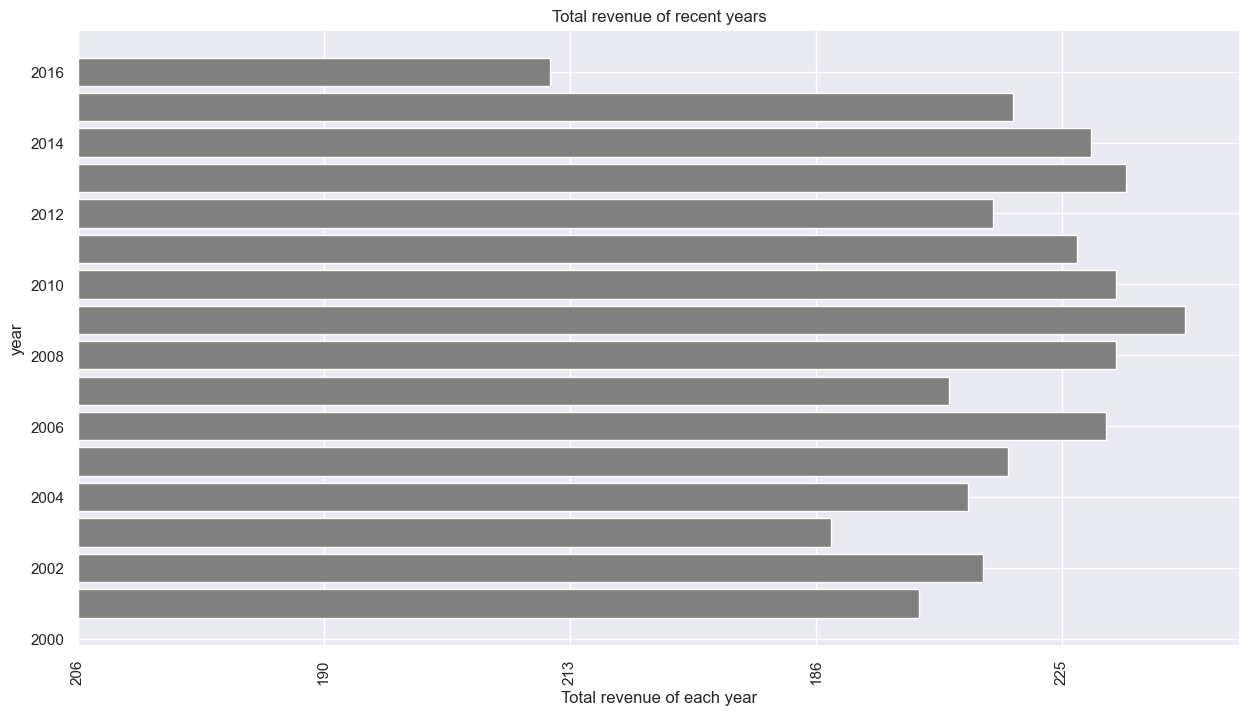

In [92]:
# نمودار زیر تعداد فیلم ساخته شده از سال 2000 تا 2016 را نشان می دهد


fig , ax = plt.subplots(figsize=(15,8))
ax.barh(sum_of_each_year[sum_of_each_year.index>2000].index,sum_of_each_year[sum_of_each_year.index>2000]['count'],color='gray' )

ax.set_title('Total revenue of recent years')
ax.set_ylabel('year') 
ax.set_xlabel('Total revenue of each year') 
ax.set_xticklabels(labels=sum_of_each_year[sum_of_each_year.index>2000]['count'],rotation=90 )

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3276175999.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=sum_of_each_year[sum_of_each_year.index>2000]['revenue'],rotation=90 )


[Text(0.0, 0, '30518012658.162582'),
 Text(5000000000.0, 0, '29212524260.117943'),
 Text(10000000000.0, 0, '28614958017.158787'),
 Text(15000000000.0, 0, '27947211052.913498'),
 Text(20000000000.0, 0, '27444960320.62896'),
 Text(25000000000.0, 0, '24456262097.137882'),
 Text(30000000000.0, 0, '23370376358.528072'),
 Text(35000000000.0, 0, '23305303229.88009')]

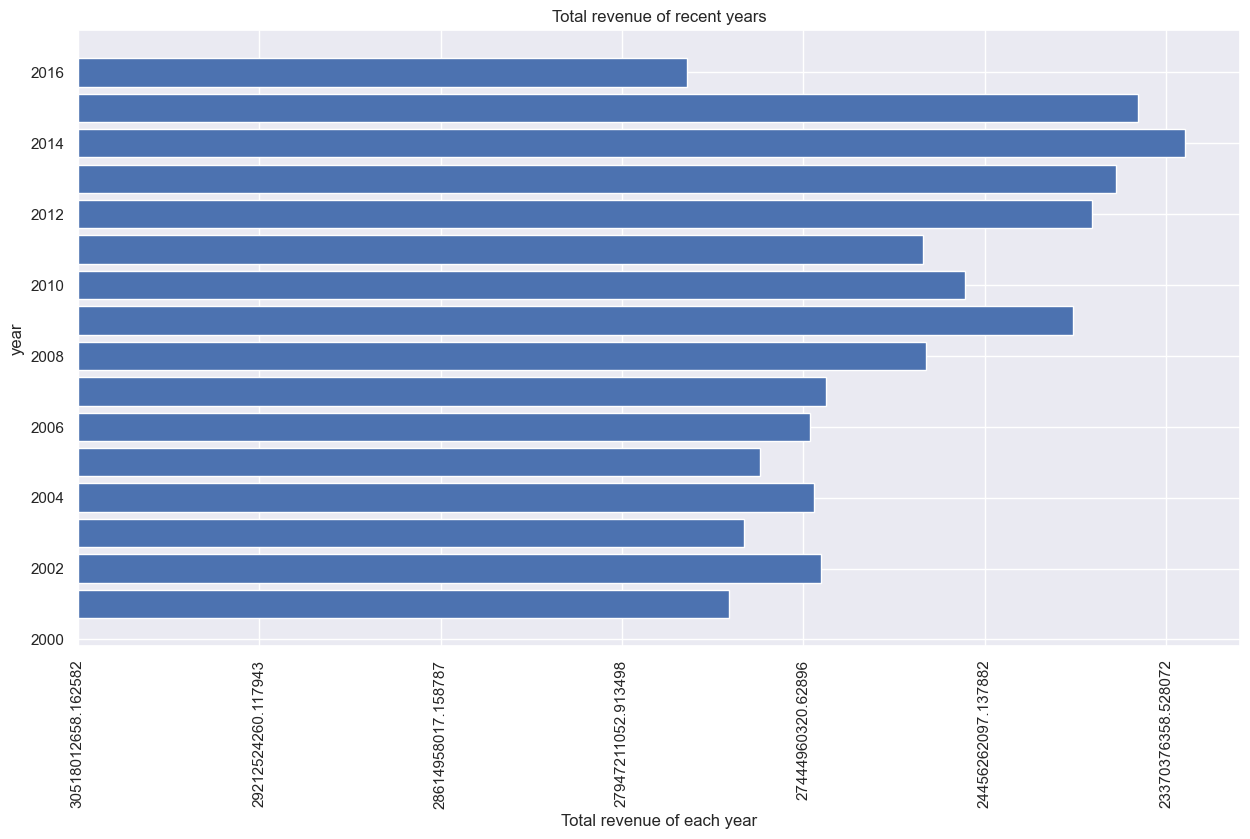

In [93]:
# نمودار زیر میزان فروش از سال 2000 تا 2016 را نشان می دهد


fig , ax = plt.subplots(figsize=(15,8))
ax.barh(sum_of_each_year[sum_of_each_year.index>2000].index,sum_of_each_year[sum_of_each_year.index>2000]['revenue'] )

ax.set_title('Total revenue of recent years')
ax.set_ylabel('year') 
ax.set_xlabel('Total revenue of each year') 
ax.set_xticklabels(labels=sum_of_each_year[sum_of_each_year.index>2000]['revenue'],rotation=90 )


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 فروش فیلم‌ها در سال 2014 در بیشترین مقدار خود بوده
    </font>
</p>


In [94]:
sum_of_each_year[sum_of_each_year.index==2014]

,revenue,count
release_Year,,
2014.0,3.051801e+10,206






<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 در این سال چه فیلم‌هایی بیشترین فروش را داشته اند؟
    </font>
</p>

In [95]:
revenue_by_year[revenue_by_year['release_Year']==2014].sort_values(by='revenue',ascending=False)

,title,genres,release_Year,revenue
36,transformers: age of extinction,sci-fi action adventure,2014.0,1.091405e+09
19,the hobbit: the battle of the five armies,action adventure fantasy,2014.0,9.560198e+08
94,guardians of the galaxy,action sci-fi adventure,2014.0,7.733286e+08
81,maleficent,fantasy adventure action family romance,2014.0,7.585398e+08
200,the hunger games: mockingjay - part 1,sci-fi adventure thriller,2014.0,7.521002e+08
...,...,...,...,...
4379,i origins,sci-fi drama,2014.0,3.364720e+05
4576,blue ruin,crime thriller,2014.0,2.583840e+05
3295,aloft,drama,2014.0,5.308600e+04
3874,the opposite sex,comedy,2014.0,4.500000e+04



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 در هر سال چه ژانرهایی بیشترین فروش را داشتند؟
    </font>
</p>

In [96]:
# این تابع محاسبه می‌کند در هر سال چه ژانری بیشترین فروش را داشته است

def common_genre_of_each_year(genres_list,revenue_by_year):
    common_genre_of_year=pd.DataFrame()
    common_genre_of_year.index=[*range(1916,2017)]
    common_genre_of_year['common_genres']=None
    for i in range(1916,2017):
        uu=revenue_by_year[revenue_by_year['release_Year']==i]  # در اینجا داده‌های مربوط به هر سال را در دیتا فریم uu می‌ریزیم.
        common_genre_of_year['common_genres'][i]=common_genre(x,uu)['count'].sort_values(ascending=False).index[0] # در دیتا فریمی که خط قبل ایجاد کردیم ژانری که بیشترین فروش را داشته انتخاب می کنیم.
           # از تابعی که در بخش ژانر فیلم‌ها ساخته بودیم استفاده کردیم
    return common_genre_of_year


In [97]:
common_genre_of_each_year_df=common_genre_of_each_year(genres_list,revenue_by_year).sort_index(ascending=False)
common_genre_of_each_year_df[0:17]

,common_genres
2016,action
2015,drama
2014,drama
2013,drama
2012,comedy
2011,drama
2010,drama
2009,drama
2008,drama
2007,drama



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 جدول بالا ژانر پرفروش ترین فیلم ها از سال 2000 تا 2016 را نشان می‌دهد.
    </font>
</p>

In [98]:
df.head(1)

,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,director,release_Year,release_month,profit
0,237000000.0,action adventure fantasy sci-fi,19995,en,150.437577,"[{""name"": ""ingenious film partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",Released,avatar,7.2,11800,james cameron,2009.0,12.0,2.550965e+09


---

---

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=10>
بریز و بپاش در عرصه‌ی سینما
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 با توجه به بودجه‌ی فیلم‌ها، آن ها را به سه دسته‌ی کم هزینه، متوسط و پر هزینه تقسیم کنید
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 باتوجه به مقاله ی زیر فیلم‌ها را بدین صورت طبقه بندی می‌کنیم:
    </font>
</p>




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 فیلم‌های کم هزینه (low-budget): فیلم‌هایی با بودجه‌ی کمتر از 5 ملیون دلار.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  فیلم های متوسط (mid-budget): فیلم هایی بابودجه‌ی بین 5 تا 50 میلیون دلار.
    </font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  فیلم های پرهزینه (high-budget): فیلم هایی بابودجه‌ی بیش از 50 میلیون دلار.
    </font>
</p>

https://www.studiobinder.com/blog/production-budget/

In [99]:
df['budget'].max()

380000000.0

In [100]:
budget_analyze= df[['title','popularity','vote_average','budget']] # ساخت دیتا فریم جدید برای تحلیل بودجه

bins=[0,5000000,50000000,380000000]   # بازه ها
labels=['low-budget','mid-budget','high-budget'] #برچسب ها 

budget_analyze['Budget Category']=pd.cut(budget_analyze['budget'], bins, labels=labels) # تقسیم بندی ستون بودجه به سه بخش 
budget_analyze

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\2761995955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_analyze['Budget Category']=pd.cut(budget_analyze['budget'], bins, labels=labels) # تقسیم بندی ستون بودجه به سه بخش


,title,popularity,vote_average,budget,Budget Category
0,avatar,150.437577,7.2,2.370000e+08,high-budget
1,pirates of the caribbean: at world's end,139.082615,6.9,3.000000e+08,high-budget
2,spectre,107.376788,6.3,2.450000e+08,high-budget
3,the dark knight rises,112.312950,7.6,2.500000e+08,high-budget
4,john carter,43.926995,6.1,2.600000e+08,high-budget
...,...,...,...,...,...
4616,sisters in law,0.025211,7.3,1.291237e+07,mid-budget
4685,the case of the grinning cat,0.092562,7.7,1.291237e+07,mid-budget
4711,aroused,2.557258,7.2,1.291237e+07,mid-budget
4731,indie game: the movie,7.676677,7.4,1.291237e+07,mid-budget


---


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 نمودار هزینه-محبوبیت بکشید.
    </font>
</p>


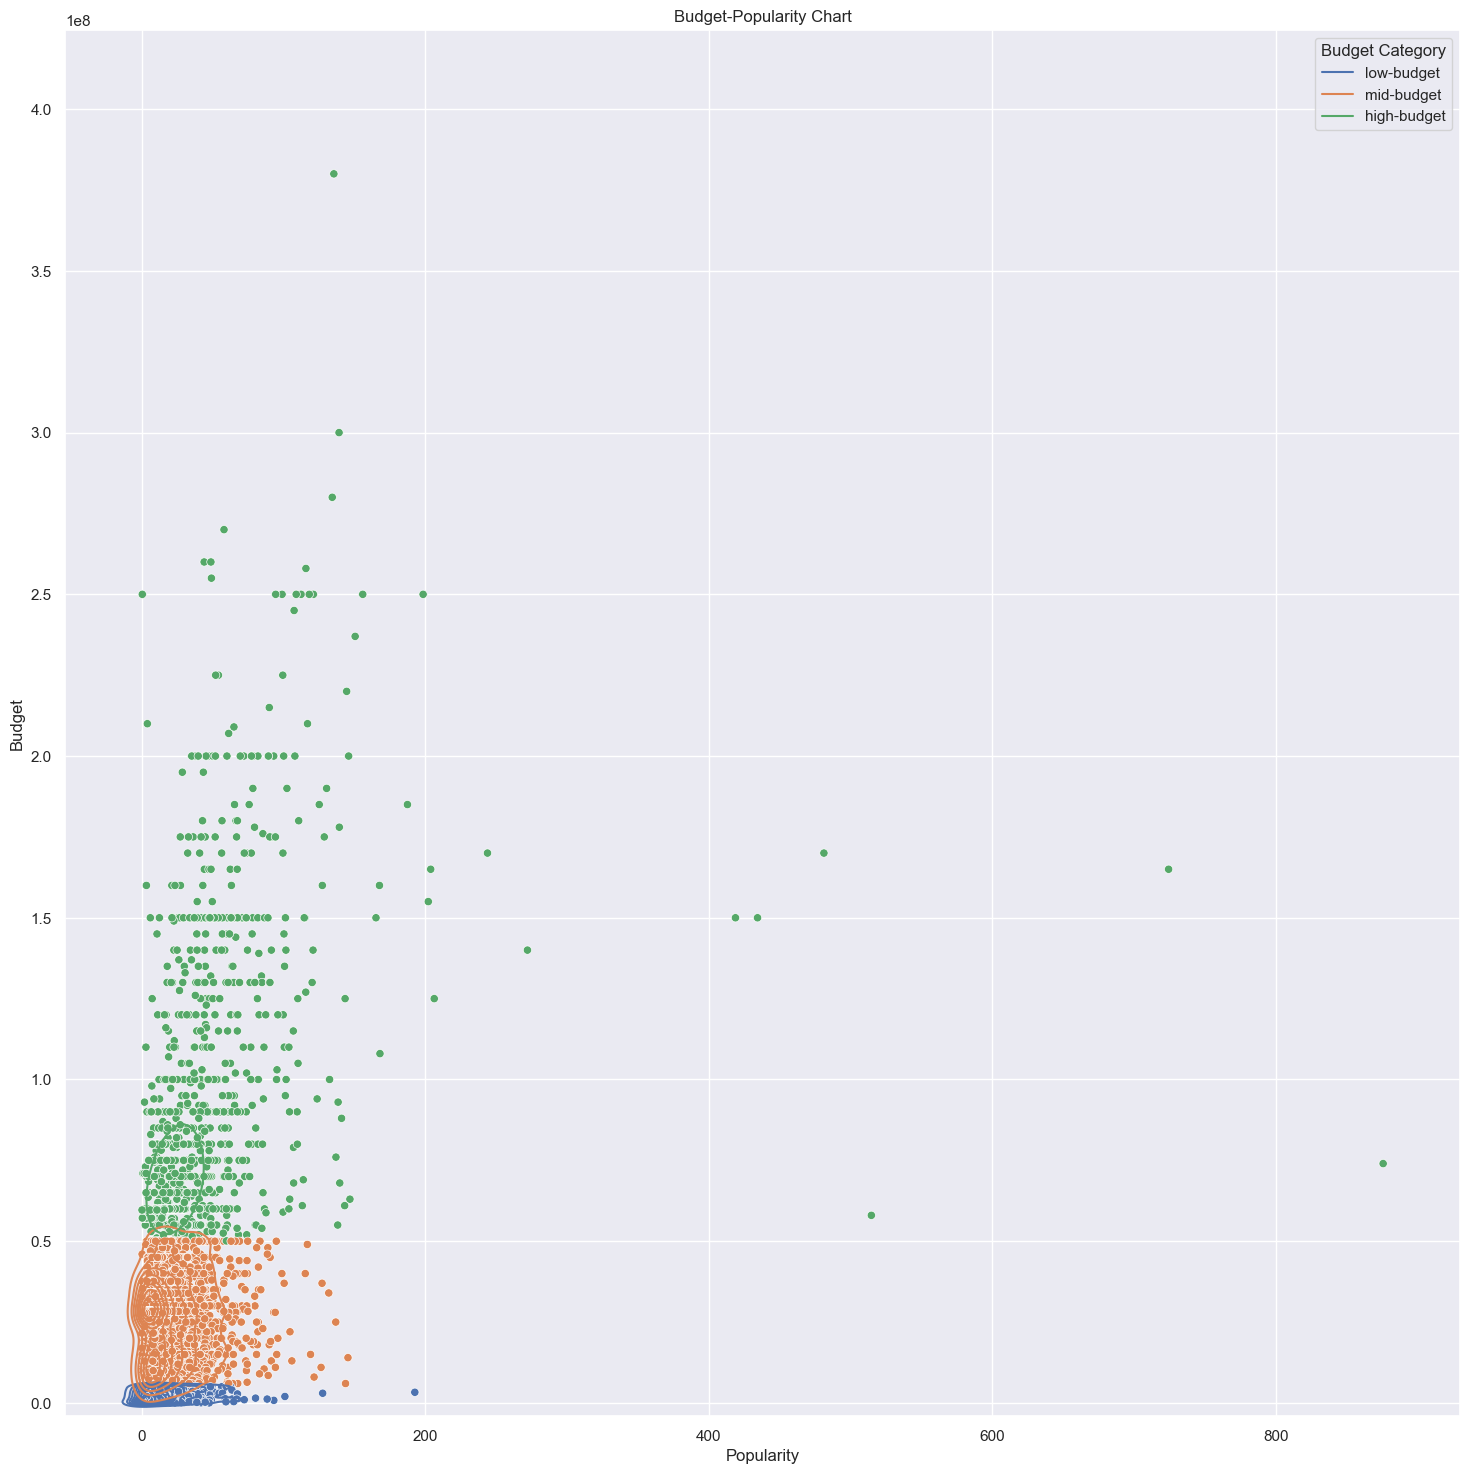

In [101]:
sns.set_theme()

fig , ax = plt.subplots(figsize=(18,18))

sns.scatterplot(data=budget_analyze, y="budget", x="popularity", hue='Budget Category',ax=ax)

sns.kdeplot(data=budget_analyze, y="budget", x="popularity", hue='Budget Category',ax=ax)

ax.set_title("Budget-Popularity Chart")
ax.set_ylabel("Budget")
ax.set_xlabel("Popularity");


In [102]:
budget_analyze.groupby('Budget Category')['popularity'].mean()

Budget Category
low-budget     14.186526
mid-budget     17.957964
high-budget    45.614064
Name: popularity, dtype: float64


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  همانطور که مشاهده می‌کنید میانگین محبوبیت فیلم‌هایی که پر هزینه هستند بیشتر است.
    </font>
</p>




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  در ادامه می‌توانیم نمدار نمره-محبوبیت را نیز رسم کنیم!
    </font>
</p>

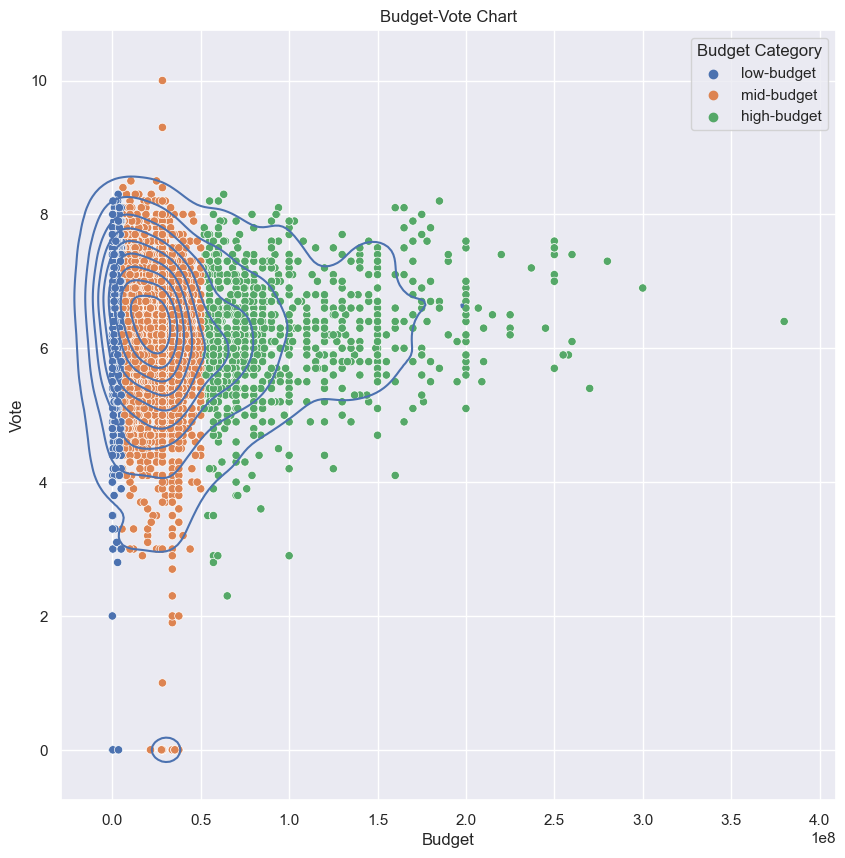

In [103]:
sns.set_theme()

fig , ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=budget_analyze, x="budget", y="vote_average", hue='Budget Category',ax=ax)

sns.kdeplot(data=budget_analyze, x="budget", y="vote_average",ax=ax)

ax.set_title("Budget-Vote Chart")
ax.set_xlabel("Budget")
ax.set_ylabel("Vote");




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  این نمودار نشان می‌دهد فیلم هایی که نمره‌ی بهتری دارند  لزوما هزینه‌ی بیشتری ندارند! و در دسته mid-budget قرار می‌گیرند
    </font>
</p>

---

---

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=10>
جدال کارگردان‌ها
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 میانگین محبوبیت هر کارگردان‌ را محاسبه کنید. کدام کارگردان محبوبیت بیشتری دارد؟
    </font>
</p>


In [104]:
popularity_of_directors=df.groupby('director')['popularity'].mean() # محاسبه‌ی میانگین محبوبیت هر کارگردان
popularity_of_directors=popularity_of_directors.to_frame()
popularity_of_directors

,popularity
director,
\u00c0lex pastor,12.708963
\u00c1lex de la iglesia,9.318033
\u00c9mile gaudreault,2.080741
\u00c9ric tessier,0.205034
\u00c9tienne faure,0.583446
...,...
zack snyder,72.309094
zackary adler,1.759506
zal batmanglij,11.383570


In [105]:
popularity_of_directors.sort_values(by='popularity',ascending=False)  # مرتب کردن نام کارگردان بر اساس محبوبیت

,popularity
director,
kyle balda,875.581305
tim miller,514.569956
colin trevorrow,221.947277
damien chazelle,192.528841
christopher nolan,185.373245
...,...
paolo monico,0.008263
mariette monpierre,0.007254
jerome elston scott,0.006323



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 آقای kyle balda با بیشترین محبوبیت در جایگاه اول قرار دارد و استاد کریستوفر نولان در رتبه‌ی پنجم!
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 تعداد فیلم‌های هر کارگردان را محاسبه کنید. آیا بین محبوبیت کارگردان‌ها و تعداد فیلم‌های آن‌ها رابطه‌ای وجود دارد؟
    </font>
</p>


In [106]:
number_of_directors_movies=df.groupby('director')['title'].nunique()  # محاسبه‌ی تعداد فیلم‌های هر کارگردان
number_of_directors_movies

director
\u00c0lex pastor           1
\u00c1lex de la iglesia    1
\u00c9mile gaudreault      1
\u00c9ric tessier          1
\u00c9tienne faure         1
                          ..
zack snyder                7
zackary adler              1
zal batmanglij             2
zhang yimou                6
zoran lisinac              1
Name: title, Length: 2078, dtype: int64

In [107]:
directors_information=popularity_of_directors.copy()
directors_information['number_of_movies']=number_of_directors_movies #ساخت یک دیتا فریم برای ذخیره‌ی داده‌های هر فیلم 
directors_information

,popularity,number_of_movies
director,,
\u00c0lex pastor,12.708963,1
\u00c1lex de la iglesia,9.318033,1
\u00c9mile gaudreault,2.080741,1
\u00c9ric tessier,0.205034,1
\u00c9tienne faure,0.583446,1
...,...,...
zack snyder,72.309094,7
zackary adler,1.759506,1
zal batmanglij,11.383570,2


In [108]:
#محاسبه‌ی کرولیشن به کمک روش پیرسون 
corolation = np.corrcoef(directors_information['popularity'],directors_information['number_of_movies'])
corolation

array([[1.        , 0.18414823],
       [0.18414823, 1.        ]])

Text(0.5, 0, 'number of Movies')

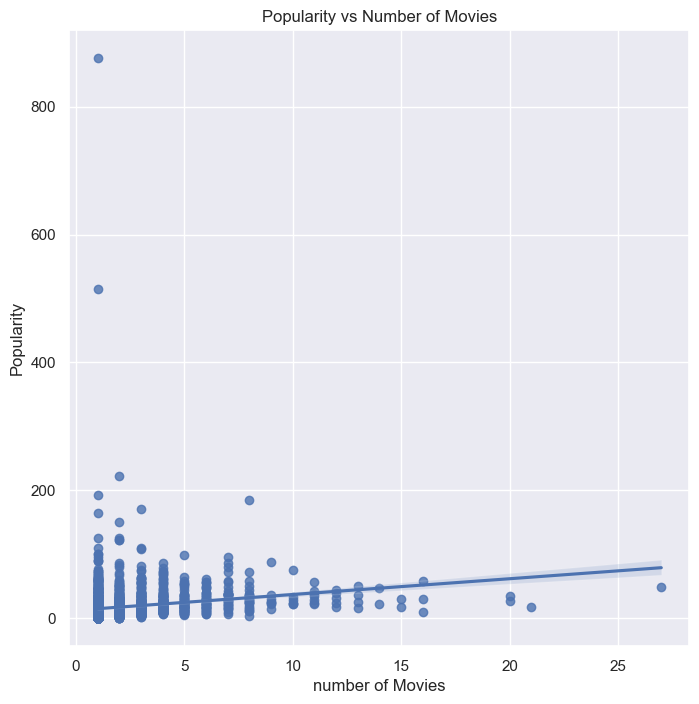

In [109]:
sns.set_theme()

fig , ax = plt.subplots(figsize=(8,8))


sns.regplot(y='popularity', x='number_of_movies', data=directors_information, ax= ax);

ax.set_title("Popularity vs Number of Movies")
ax.set_ylabel("Popularity")
ax.set_xlabel("number of Movies")


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 میانگین مدت زمان فیلم‌های هر کارگردان را محاسبه کنید. کدام کارگردان‌ها بلندترین فیلم‌ها را می‌سازند؟
    </font>
</p>


In [110]:
mean_of_directors_movies_time=df.groupby('director')['runtime'].mean()  # محاسبه‌ی میانگین مدت زمان فیلم‌های هر کارگردان
directors_information['mean_of_movies_time']=mean_of_directors_movies_time

In [111]:
directors_information.sort_values(by='mean_of_movies_time')

,popularity,number_of_movies,mean_of_movies_time
director,,,
romesh sharma,0.122704,1,0.0
mark griffiths,1.923514,1,0.0
marcia bennett,0.407030,1,0.0
clark baker,0.322553,1,14.0
bill melendez,8.701183,1,25.0
...,...,...,...
michael cimino,12.583258,2,201.0
michael wadleigh,3.409764,1,225.0
ronald f. maxwell,4.945785,2,234.0


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 آقای olivier assayas فیلم را با زمان 338 دقیقه ساخته اند.
    </font>
</p>

---

---

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=10>
قدرت‌‌ نمایی شرکت‌ها
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 میزان محبوبیت، فروش و تعداد فیلم‌های ساخته شده‌ی هر شرکت را بیابید.
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  لیست کمپانی‌ها را در بخش آماده‌سازی پیدا کردیم.
    </font>
</p>

In [112]:
len(company_list) #لیست کمپانی‌ها

5557

In [113]:
# این تابع یک دیتا فریم می‌سازد و محبوبیت فیلم های هر کمپانی را در آن ذخیره می‌کند


def popularity_of_each_company(x):   # x: لیست کمپانی‌ها
    company_popularity=pd.DataFrame()
    company_popularity.index=x
    company_popularity['mean_of_popularity']=None

    for i in x:
         # پیدا کردن سطرهایی که شامل آن کمپانی هستند و محاسبه‌ی میانگین محبوبیت آن سطرها
        company_popularity['mean_of_popularity'][i]=df.loc[df['production_companies'].str.contains(i)]['popularity'].mean() 
       

        
    return company_popularity



In [114]:
company_information=popularity_of_each_company(company_list)  # فراخانی تابع 

company_information.sort_values(['mean_of_popularity'],ascending=False) # مرتب کردن به صورت نزولی

C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\91869278.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  company_popularity['mean_of_popularity'][i]=df.loc[df['production_companies'].str.contains(i)]['popularity'].mean()


,mean_of_popularity
the donners' company,514.569956
bulletproof cupid,481.098624
kinberg genre,326.920999
illumination entertainment,234.920042
deluxe digital studios,198.372395
...,...
liberty films (ii),NaN
instituto de crédito oficial (ico),NaN
british broadcasting corporation (bbc),NaN
indigent (independent digital entertainment),NaN




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  طبق جدول بالا کمپانی euro film funding بیشترین محبوبیت را دارد.
    </font>
</p>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  در قدم بعدی میانگین فروش هر کمپانی را بررسی می‌کنیم
    </font>
</p>

In [115]:
# این تابع یک دیتا فریم می‌سازد و فروش فیلم های هر کمپانی را در آن ذخیره می‌کند


def revenue_of_each_company(x):   # x: لیست کمپانی‌ها
    company_revenue=pd.DataFrame()
    company_revenue.index=x
    company_revenue['mean_of_revenue']=None

    for i in x:
         # پیدا کردن سطرهایی که شامل آن کمپانی هستند و محاسبه‌ی میانگین محبوبیت آن سطرها
        company_revenue['mean_of_revenue'][i]=df.loc[df['production_companies'].str.contains(i)]['revenue'].mean() 
       

        
    return company_revenue



In [116]:
company_information['mean_of_revenue']=revenue_of_each_company(company_list)  # فراخانی تابع 



C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\3146622940.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  company_revenue['mean_of_revenue'][i]=df.loc[df['production_companies'].str.contains(i)]['revenue'].mean()


In [117]:
company_information

,mean_of_popularity,mean_of_revenue
kouf/bigelow productions,45.154631,224012234.0
new line cinema,27.924684,130502321.183062
das kleine fernsehspiel (zdf),NaN,NaN
hal films,5.831302,103819143.422205
paul schiff productions,7.095362,56605370.307021
...,...,...
cine grande corporation,2.609057,76382.0
tooley productions,20.792603,22852638.0
chambara pictures,35.720522,59805813.0
lord of the wind,7.288352,10000000.0





<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  در قدم آخر تعداد فیلم‌های ساخته شده توسط هر کمپانی را محاسبه می‌کنیم
    </font>
</p>

In [118]:
# این تابع یک دیتا فریم می‌سازد و تعداد فیلم‌های ساخته شده توسط هر کمپانی را در ان ذخیره می‌کند


def number_of_company_movies(x):   # x: لیست کمپانی‌ها
    company_number=pd.DataFrame()
    company_number.index=x
    company_number['number_of_movies']=None

    for i in x:
         # پیدا کردن سطرهایی که شامل آن کمپانی هستند و محاسبه‌ی تعداد فیلم‌های آن کمپانی
        company_number['number_of_movies'][i]=len(df.loc[df['production_companies'].str.contains(i)])
       

        
    return company_number



In [119]:
company_information['number_of_movies']=number_of_company_movies(company_list)  # فراخانی تابع 


C:\Users\zrabi\AppData\Local\Temp\ipykernel_11472\2092547997.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  company_number['number_of_movies'][i]=len(df.loc[df['production_companies'].str.contains(i)])


In [120]:
company_information

,mean_of_popularity,mean_of_revenue,number_of_movies
kouf/bigelow productions,45.154631,224012234.0,1
new line cinema,27.924684,130502321.183062,164
das kleine fernsehspiel (zdf),NaN,NaN,0
hal films,5.831302,103819143.422205,1
paul schiff productions,7.095362,56605370.307021,5
...,...,...,...
cine grande corporation,2.609057,76382.0,1
tooley productions,20.792603,22852638.0,1
chambara pictures,35.720522,59805813.0,2
lord of the wind,7.288352,10000000.0,1



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red>
 کدام شرکت‌ها فروش، محبوبیت و تعداد فیلم بیشتری دارند
    </font>
</p>






<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  از دیتا فریم سوال قبل استفاده می‌کنیم، ابتدا 50 فیلم برتر از لحاظ فروش را پیدا می‌کنیم. بعد از بین آن‌ها شرکت‌هایی که محبوبیت بیشتری دارند را جدا کرده و در نهایت تعداد فیلم هر کدام را مقایسه می‌کنیم.
    </font>
</p>

In [121]:
company_information.sort_values(by='mean_of_revenue',ascending=False)[0:50].sort_values(by='mean_of_popularity',ascending=False)[0:40].\
    sort_values(by='number_of_movies',ascending=False)[0:30]

,mean_of_popularity,mean_of_revenue,number_of_movies
pixar animation studios,82.277073,613112049.25,16
pixar animation studios,82.277073,613112049.25,16
marvel studios,134.58636,779876975.384615,13
marvel studios,134.58636,779876975.384615,13
heyday films,77.6484,584017792.494016,13
wingnut films,85.917495,643763863.818182,11
wingnut films,85.917495,643763863.818182,11
syncopy,192.417188,604991260.5,8
fuji television network,124.341865,725941957.166667,6
walt disney studios motion pictures,90.507609,613478043.6,5


---

---